In [1]:
#Author Kanishk Asthana kasthana@eucsd.edu

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
import os
from datetime import datetime,timedelta
import argparse
import sys

In [24]:
timeTaggedDGE1File="~/kanishk2/hg19/March2024BulkK562Experiments4H_Monitoring_ChronoseqV4/K562_BULK_LPS_STIMULATION_AFTER1H/K562_BULK_LPS_STIMULATION_AFTER1H_PART_1/K562_BULK_LPS_STIMULATION_AFTER1H.aligned.sorted.merged.tagged.dge.time_tags.csv.gz"
timeTaggedDGE2File="~/kanishk2/hg19/March2024BulkK562Experiments4H_Monitoring_ChronoseqV4/K562_BULK_LPS_STIMULATION_AFTER1H/K562_BULK_LPS_STIMULATION_AFTER1H_PART_2/K562_BULK_LPS_STIMULATION_AFTER1H_PART_2.aligned.sorted.merged.tagged.dge.time_tags.csv.gz"
outputFile="/stg1/data2/kanishk/kanishk2/hg19/March2024BulkK562Experiments4H_Monitoring_ChronoseqV4/K562_BULK_LPS_STIMULATION_AFTER1H/CombinedDataset.csv.gz"
timeTaggedDGE1File=os.path.expanduser(timeTaggedDGE1File)
timeTaggedDGE2File=os.path.expanduser(timeTaggedDGE2File)

In [25]:
print("Time Tagged DGE 1 Path: "+timeTaggedDGE1File)
print("Time Tagged DGE 2 Path: "+timeTaggedDGE2File)

Time Tagged DGE 1 Path: /stg1/data2/kanishk/kanishk2/hg19/March2024BulkK562Experiments4H_Monitoring_ChronoseqV4/K562_BULK_LPS_STIMULATION_AFTER1H/K562_BULK_LPS_STIMULATION_AFTER1H_PART_1/K562_BULK_LPS_STIMULATION_AFTER1H.aligned.sorted.merged.tagged.dge.time_tags.csv.gz
Time Tagged DGE 2 Path: /stg1/data2/kanishk/kanishk2/hg19/March2024BulkK562Experiments4H_Monitoring_ChronoseqV4/K562_BULK_LPS_STIMULATION_AFTER1H/K562_BULK_LPS_STIMULATION_AFTER1H_PART_2/K562_BULK_LPS_STIMULATION_AFTER1H_PART_2.aligned.sorted.merged.tagged.dge.time_tags.csv.gz


In [4]:
timeTaggedDGE1=pd.read_table(timeTaggedDGE1File,sep=",")
timeTaggedDGE1.head()

,CELL BARCODES,A1BG,A1BG-AS1,A1CF,A2M,A4GALT,AAAS,AACS,AADACL4,AAED1,...,hsa-mir-1199,hsa-mir-125a,hsa-mir-150,hsa-mir-335,hsa-mir-490,hsa-mir-6080,hsa-mir-8072,snoU2-30,COUNTS,FINAL TIME TAG
0,TTCACAGTTCTG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,240.0,1
1,GGCAGATCGGCG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,942.0,1
2,TCCATGCACCAC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,289.0,1
3,TTTAACTGGCGC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,96.0,1
4,AGAATCAGTCCC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,548.0,1


In [5]:
timeTaggedDGE2=pd.read_table(timeTaggedDGE2File,sep=",")

In [6]:
timeTaggedDGE2.head()

,CELL BARCODES,A1BG,A1BG-AS1,A1CF,A4GALT,AAAS,AACS,AAED1,AAGAB,AAK1,...,ZZZ3,hsa-mir-1199,hsa-mir-125a,hsa-mir-335,hsa-mir-490,hsa-mir-6080,hsa-mir-8072,snoU2-30,COUNTS,FINAL TIME TAG
0,CCCCAGGTTAGT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,719.0,1
1,CCGTCGAAGCAG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,168.0,1
2,ATTTTTATTCTC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,222.0,1
3,CCAGAGGTTGCA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,189.0,1
4,ACTCGACTACGC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,702.0,1


In [7]:
#Adding The Maximum Value of Time-Tags from First Experiment to Second
max_value=timeTaggedDGE1["FINAL TIME TAG"].max()

In [8]:
#Shifting Time-Tag Up by Maximum Value from First DGE File
timeTaggedDGE2["FINAL TIME TAG"]=timeTaggedDGE2["FINAL TIME TAG"]+max_value

In [9]:
timeTaggedDGE2.head()

,CELL BARCODES,A1BG,A1BG-AS1,A1CF,A4GALT,AAAS,AACS,AAED1,AAGAB,AAK1,...,ZZZ3,hsa-mir-1199,hsa-mir-125a,hsa-mir-335,hsa-mir-490,hsa-mir-6080,hsa-mir-8072,snoU2-30,COUNTS,FINAL TIME TAG
0,CCCCAGGTTAGT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,719.0,13
1,CCGTCGAAGCAG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,168.0,13
2,ATTTTTATTCTC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,222.0,13
3,CCAGAGGTTGCA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,189.0,13
4,ACTCGACTACGC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,702.0,13


In [11]:
#Getting Common Genes in Both Datasets
commonGenes=sorted(list(set(timeTaggedDGE1.columns[1:-2]) & set(timeTaggedDGE2.columns[1:-2])))

In [12]:
#Deleting Genes that are not Common from Dataset
timeTaggedDGE1=timeTaggedDGE1[["CELL BARCODES"]+commonGenes+["FINAL TIME TAG"]]
timeTaggedDGE1["COUNTS"]=timeTaggedDGE1.iloc[:,1:-1].sum(axis=1) #Recalculating Counts
timeTaggedDGE1=timeTaggedDGE1[["CELL BARCODES"]+commonGenes+["COUNTS","FINAL TIME TAG"]]#Reordering Columns to Match Original Configuration.
timeTaggedDGE1.head()

,CELL BARCODES,A1BG,A1BG-AS1,A1CF,A4GALT,AAAS,AACS,AAED1,AAGAB,AAK1,...,ZZZ3,hsa-mir-1199,hsa-mir-125a,hsa-mir-335,hsa-mir-490,hsa-mir-6080,hsa-mir-8072,snoU2-30,COUNTS,FINAL TIME TAG
0,TTCACAGTTCTG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,240,1
1,GGCAGATCGGCG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,942,1
2,TCCATGCACCAC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,289,1
3,TTTAACTGGCGC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,96,1
4,AGAATCAGTCCC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,548,1


In [13]:
#Deleting Genes that are not Common from Dataset
timeTaggedDGE2=timeTaggedDGE2[["CELL BARCODES"]+commonGenes+["FINAL TIME TAG"]]
timeTaggedDGE2["COUNTS"]=timeTaggedDGE2.iloc[:,1:-1].sum(axis=1) #Recalculating Counts
timeTaggedDGE2=timeTaggedDGE2[["CELL BARCODES"]+commonGenes+["COUNTS","FINAL TIME TAG"]]#Reordering Columns to Match Original Configuration.
timeTaggedDGE2.head()

,CELL BARCODES,A1BG,A1BG-AS1,A1CF,A4GALT,AAAS,AACS,AAED1,AAGAB,AAK1,...,ZZZ3,hsa-mir-1199,hsa-mir-125a,hsa-mir-335,hsa-mir-490,hsa-mir-6080,hsa-mir-8072,snoU2-30,COUNTS,FINAL TIME TAG
0,CCCCAGGTTAGT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,718,13
1,CCGTCGAAGCAG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,168,13
2,ATTTTTATTCTC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,222,13
3,CCAGAGGTTGCA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,189,13
4,ACTCGACTACGC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,702,13


In [18]:
combinedTimeTaggedDGE=pd.concat([timeTaggedDGE1,timeTaggedDGE2],ignore_index=True)
combinedTimeTaggedDGE.head()

,CELL BARCODES,A1BG,A1BG-AS1,A1CF,A4GALT,AAAS,AACS,AAED1,AAGAB,AAK1,...,ZZZ3,hsa-mir-1199,hsa-mir-125a,hsa-mir-335,hsa-mir-490,hsa-mir-6080,hsa-mir-8072,snoU2-30,COUNTS,FINAL TIME TAG
0,TTCACAGTTCTG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,240,1
1,GGCAGATCGGCG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,942,1
2,TCCATGCACCAC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,289,1
3,TTTAACTGGCGC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,96,1
4,AGAATCAGTCCC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,548,1


In [19]:
combinedTimeTaggedDGE.shape

(68362, 17446)

In [20]:
combinedTimeTaggedDGE = combinedTimeTaggedDGE.drop_duplicates(subset=["CELL BARCODES"], keep=False)
combinedTimeTaggedDGE.shape

(68144, 17446)

In [21]:
#Sorting by Final Time Tag
combinedTimeTaggedDGE=combinedTimeTaggedDGE.sort_values("FINAL TIME TAG")

In [26]:
#Statistics for Each Time-Tag
time_tag_counts=combinedTimeTaggedDGE.groupby("FINAL TIME TAG").count().iloc[:,0:1]
time_tag_counts.to_csv(outputFile+".time_tag_counts_summary.csv",index=False)

Generating Bar Plot for Average number of Unique Transcripts captured per Time-Tagged Bead.


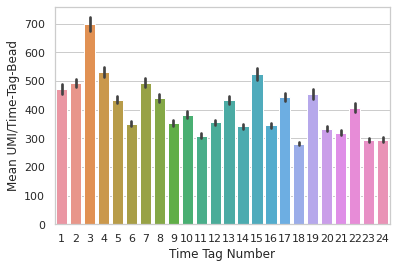

In [27]:
print("Generating Bar Plot for Average number of Unique Transcripts captured per Time-Tagged Bead.")
#Plotting Average Unique Counts Detected per Cell Barcode for Each Time Tag
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="FINAL TIME TAG", y="COUNTS", data=combinedTimeTaggedDGE)
ax.set(ylabel="Mean UMI/Time-Tag-Bead")
ax.set(xlabel="Time Tag Number")
fig=ax.get_figure()
fig.savefig(outputFile+".Tags_counts_bar_plot.png",dpi=600)

In [ ]:
#Exporting Data
print("Exporting Combined Data to Compressed CSV File.")
combinedTimeTaggedDGE.to_csv(outputFile,index=False,compression="gzip")

Exporting Combined Data to Compressed CSV File.
